<h1 style="color:red, margin-left: 30px;">Makine Öğrenimi ile Fiyat Tahmini: Bisiklet Örneği</h1>

<p>Bu projenin temel amacı, bisiklet fiyatlarını etkileyen ana değişkenleri belirleyerek regresyon analizi ve makine öğrenmesi yöntemleriyle bir model oluşturmak. Bu model, bisiklet fiyatlarını tahmin etmek için kullanılabilir ve bisiklet endüstrisinde fiyatlandırma stratejilerini anlamak için değerli bir araç sağlayabilir</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler 
from keras.optimizers import Adam

In [2]:
exel_verisi = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [71]:
exel_verisi.head()  # ilk 5 veri

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


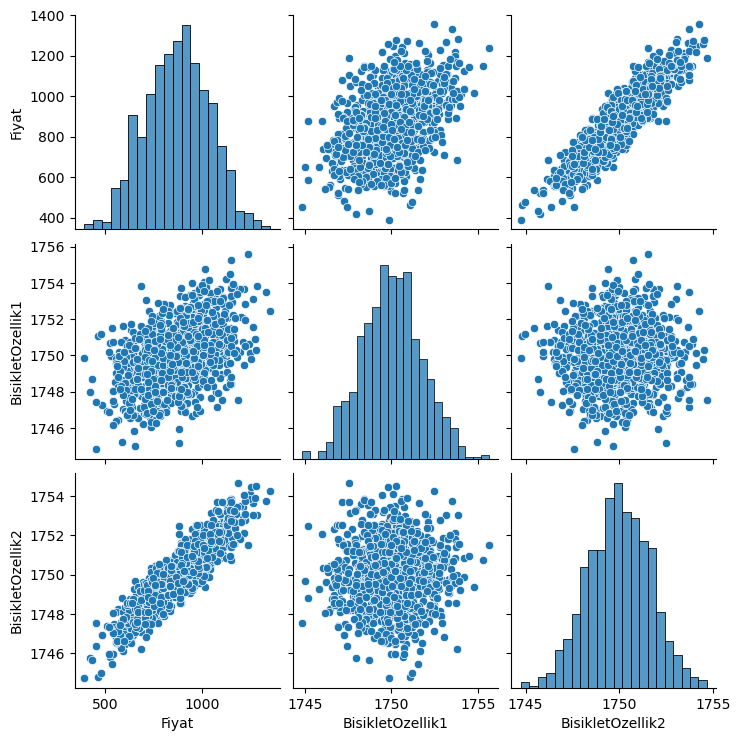

In [4]:
sbn.pairplot(exel_verisi) #genel dagılımı anlmak adına sbn.pairplot kullandım

<Axes: xlabel='Fiyat', ylabel='BisikletOzellik1'>

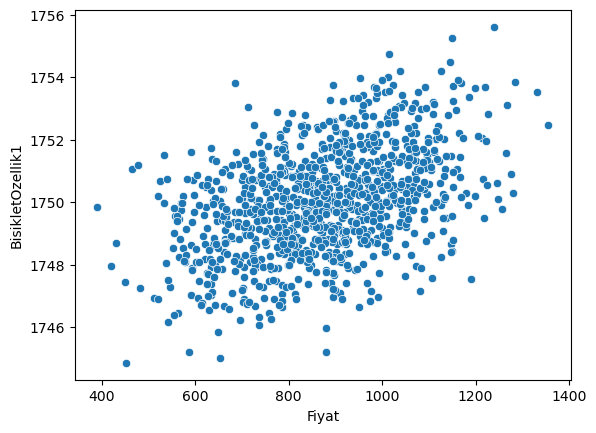

In [5]:
sbn.scatterplot(x = exel_verisi["Fiyat"],y = exel_verisi["BisikletOzellik1"])

<Axes: xlabel='Fiyat', ylabel='BisikletOzellik2'>

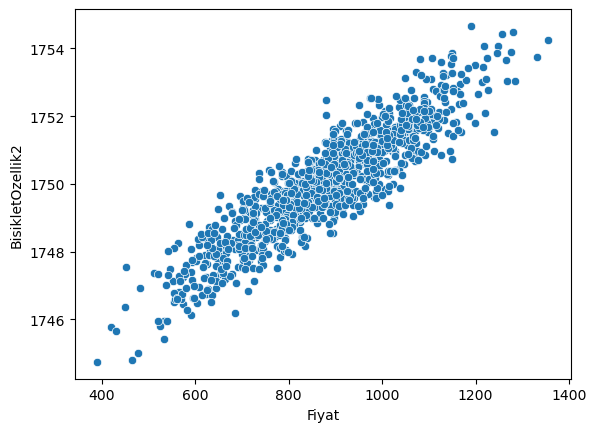

In [6]:
sbn.scatterplot(x = exel_verisi["Fiyat"],y = exel_verisi["BisikletOzellik2"])

In [7]:
#veri setinin hazırlanması

In [8]:
y_degeri = exel_verisi["Fiyat"].values 

In [9]:
x_degerleri = exel_verisi[["BisikletOzellik1","BisikletOzellik2"]].values

In [10]:
x_degerleri[0:5] #x degerleri y degerine ulaşmamaızı saglayan değişkenlerdir  örn gösterim

array([[1749.628226, 1749.590668],
       [1748.007826, 1751.824206],
       [1750.122967, 1747.977026],
       [1749.91644 , 1750.771646],
       [1750.780519, 1750.59243 ]])

In [93]:
y_degeri[0:5] # y degerleri bizim sonucumuzdur örn gösterim ilk5 değer için

array([807.6738764, 959.2275201, 718.0200329, 945.6688847, 955.5429676])

In [94]:
#veri setinin bölünmesi

In [95]:
x_train,x_test,y_train,y_test  =train_test_split(x_degerleri,y_degeri,test_size=0.40)

In [96]:
print(x_train)
print(f"x_train degerinin elaman sayisi {len(x_train)}")
print(x_train.shape)

[[1750.689609 1749.487587]
 [1750.082064 1751.670351]
 [1748.127116 1751.151004]
 ...
 [1749.635277 1752.085466]
 [1748.480833 1749.071351]
 [1748.815151 1750.096879]]
x_train degerinin elaman sayisi 600
(600, 2)


In [97]:
print(x_test[0:5]) #ÖRNEK GÖSTERMEK ADINA İLK 5 ELAMANI ALDIM
print(f"x_train degerinin elaman sayisi {len(x_test)}")
print(x_test.shape)

[[1748.425074 1750.004026]
 [1749.568884 1749.874039]
 [1747.681905 1751.334307]
 [1749.265088 1750.75487 ]
 [1749.004172 1752.532074]]
x_train degerinin elaman sayisi 400
(400, 2)


In [98]:
#x_train ve x_test degerlerini 0-1 aralıgına alarak performansı arttırmamız gerekiyor bundan dolayı

In [99]:
scaler = MinMaxScaler()

In [100]:
scaler.fit(x_train)

MinMaxScaler()

In [101]:
x_train = scaler.transform(x_train)
#Bu işlem, modelin eğitim verileri üzerinde daha iyi performans göstermesine katkıda bulunabilir.
#Bu ölçekleme işlemi, genellikle eğitim verilerini ölçeklendirdikten sonra test verilerini 
#aynı ölçeklendirme kurallarına tabi tutarak devam ettirilir.

In [102]:
x_train[0:10]

array([[0.54242915, 0.47447914],
       [0.48597518, 0.69599094],
       [0.30431854, 0.64328644],
       [0.39043537, 0.4785634 ],
       [0.54722343, 0.31061129],
       [0.34999502, 0.5118376 ],
       [0.55806458, 0.17083857],
       [0.30485851, 0.41855623],
       [0.29502194, 0.42203291],
       [0.67104956, 0.72182944]])

In [103]:
scaler.fit(x_test)

MinMaxScaler()

In [104]:
x_test = scaler.transform(x_test)
#Bu işlem, modelin eğitim verileri üzerinde daha iyi performans göstermesine katkıda bulunabilir.
#Bu ölçekleme işlemi, genellikle eğitim verilerini ölçeklendirdikten sonra test verilerini 
#aynı ölçeklendirme kurallarına tabi tutarak devam ettirilir.

In [105]:
x_test[0:10] #örn gösterim ilk 10 değer için

array([[0.32015673, 0.54010117],
       [0.43373358, 0.52675815],
       [0.24636231, 0.67665303],
       [0.40356756, 0.61717447],
       [0.3776594 , 0.79960248],
       [0.47868521, 0.51178661],
       [0.26654491, 0.51493444],
       [0.19791522, 0.70096245],
       [0.34997382, 0.46626911],
       [0.43878988, 0.38475851]])

In [106]:
#model oluşturma aşaması

In [121]:
model = Sequential() ## model oluşturduk burda şimdi buna katman eklicez
#modelin içine nöron eklicez

model.add(Dense(5,activation="relu"))  #5 kataman 6  nöron var burda
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
# modelime 3 kataman  ekledim bir de çıktı katmanı oluştutuvcam

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse") #mse sonuçtan bulunanı cıkartıp karesini alıp topluyor bunun üzerinde adam rmsprop ile gezinerek min noktasını buluyoruz ve ona göre değişiyor nöronların fonksyonları

model.fit(x_train,y_train,epochs=400)

Epoch 1/400
19/19 [==============================] - 1s 2ms/step - loss: 813579.6250
Epoch 2/400
19/19 [==============================] - 0s 2ms/step - loss: 813509.4375
Epoch 3/400
19/19 [==============================] - 0s 2ms/step - loss: 813419.6875
Epoch 4/400
19/19 [==============================] - 0s 2ms/step - loss: 813298.7500
Epoch 5/400
19/19 [==============================] - 0s 2ms/step - loss: 813133.1250
Epoch 6/400
19/19 [==============================] - 0s 2ms/step - loss: 812901.0625
Epoch 7/400
19/19 [==============================] - 0s 2ms/step - loss: 812574.0000
Epoch 8/400
19/19 [==============================] - 0s 2ms/step - loss: 812111.4375
Epoch 9/400
19/19 [==============================] - 0s 2ms/step - loss: 811448.9375
Epoch 10/400
19/19 [==============================] - 0s 2ms/step - loss: 810506.9375
Epoch 11/400
19/19 [==============================] - 0s 2ms/step - loss: 809164.7500
Epoch 12/400
19/19 [==============================] - 0s 2ms/st

19/19 [==============================] - 0s 2ms/step - loss: 6864.3350
Epoch 98/400
19/19 [==============================] - 0s 2ms/step - loss: 6835.1294
Epoch 99/400
19/19 [==============================] - 0s 2ms/step - loss: 6801.9810
Epoch 100/400
19/19 [==============================] - 0s 2ms/step - loss: 6771.5410
Epoch 101/400
19/19 [==============================] - 0s 2ms/step - loss: 6732.3735
Epoch 102/400
19/19 [==============================] - 0s 2ms/step - loss: 6698.4116
Epoch 103/400
19/19 [==============================] - 0s 2ms/step - loss: 6666.0811
Epoch 104/400
19/19 [==============================] - 0s 1ms/step - loss: 6633.1362
Epoch 105/400
19/19 [==============================] - 0s 1ms/step - loss: 6596.3359
Epoch 106/400
19/19 [==============================] - 0s 2ms/step - loss: 6565.1870
Epoch 107/400
19/19 [==============================] - 0s 2ms/step - loss: 6528.4683
Epoch 108/400
19/19 [==============================] - 0s 2ms/step - loss: 6493.3

19/19 [==============================] - 0s 2ms/step - loss: 3127.2888
Epoch 194/400
19/19 [==============================] - 0s 2ms/step - loss: 3088.8352
Epoch 195/400
19/19 [==============================] - 0s 2ms/step - loss: 3048.0503
Epoch 196/400
19/19 [==============================] - 0s 1ms/step - loss: 3002.6382
Epoch 197/400
19/19 [==============================] - 0s 2ms/step - loss: 2962.1438
Epoch 198/400
19/19 [==============================] - 0s 2ms/step - loss: 2923.9985
Epoch 199/400
19/19 [==============================] - 0s 2ms/step - loss: 2883.6628
Epoch 200/400
19/19 [==============================] - 0s 2ms/step - loss: 2841.5706
Epoch 201/400
19/19 [==============================] - 0s 2ms/step - loss: 2802.1851
Epoch 202/400
19/19 [==============================] - 0s 2ms/step - loss: 2760.0732
Epoch 203/400
19/19 [==============================] - 0s 2ms/step - loss: 2733.5359
Epoch 204/400
19/19 [==============================] - 0s 2ms/step - loss: 2677

Epoch 290/400
19/19 [==============================] - 0s 2ms/step - loss: 314.3755
Epoch 291/400
19/19 [==============================] - 0s 2ms/step - loss: 304.9944
Epoch 292/400
19/19 [==============================] - 0s 2ms/step - loss: 293.4752
Epoch 293/400
19/19 [==============================] - 0s 2ms/step - loss: 283.5658
Epoch 294/400
19/19 [==============================] - 0s 2ms/step - loss: 273.7891
Epoch 295/400
19/19 [==============================] - 0s 2ms/step - loss: 266.3799
Epoch 296/400
19/19 [==============================] - 0s 2ms/step - loss: 258.0469
Epoch 297/400
19/19 [==============================] - 0s 2ms/step - loss: 246.4141
Epoch 298/400
19/19 [==============================] - 0s 2ms/step - loss: 238.0770
Epoch 299/400
19/19 [==============================] - 0s 1ms/step - loss: 230.4038
Epoch 300/400
19/19 [==============================] - 0s 2ms/step - loss: 224.2696
Epoch 301/400
19/19 [==============================] - 0s 2ms/step - loss: 2

19/19 [==============================] - 0s 2ms/step - loss: 78.1061
Epoch 389/400
19/19 [==============================] - 0s 2ms/step - loss: 77.7580
Epoch 390/400
19/19 [==============================] - 0s 1ms/step - loss: 77.2218
Epoch 391/400
19/19 [==============================] - 0s 2ms/step - loss: 77.6905
Epoch 392/400
19/19 [==============================] - 0s 2ms/step - loss: 79.0534
Epoch 393/400
19/19 [==============================] - 0s 2ms/step - loss: 77.8377
Epoch 394/400
19/19 [==============================] - 0s 2ms/step - loss: 78.3268
Epoch 395/400
19/19 [==============================] - 0s 2ms/step - loss: 77.8878
Epoch 396/400
19/19 [==============================] - 0s 2ms/step - loss: 77.6138
Epoch 397/400
19/19 [==============================] - 0s 1ms/step - loss: 77.6879
Epoch 398/400
19/19 [==============================] - 0s 2ms/step - loss: 78.1202
Epoch 399/400
19/19 [==============================] - 0s 2ms/step - loss: 80.0730
Epoch 400/400
19/1

In [122]:
hata_grafigi = model.history.history["loss"]

<Axes: >

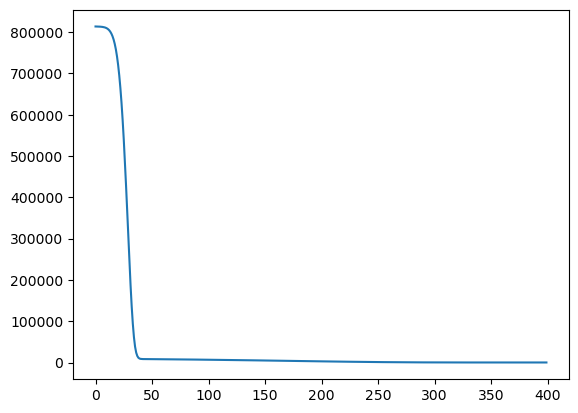

In [123]:
sbn.lineplot(x=range(len(hata_grafigi)),y = hata_grafigi)

In [124]:
test_tahminleri = model.predict(x_test)

13/13 [==============================] - 0s 1ms/step


In [125]:
tahmin_degeri = pd.DataFrame(y_test,columns=["gercek_deger"])

In [126]:
tahmin_degeri

,gercek_deger
0,816.732802
1,842.683560
2,897.662404
3,906.512419
4,1067.660488
...,...
395,919.723311
396,950.442374
397,886.093773
398,1245.401103


In [127]:
tahmin_degeri["model_tahmini"] = np.array(test_tahminleri)

In [128]:
tahmin_degeri

,gercek_deger,model_tahmini
0,816.732802,817.459839
1,842.683560,855.117920
2,897.662404,904.051392
3,906.512419,920.559937
4,1067.660488,1067.755249
...,...,...
395,919.723311,925.364136
396,950.442374,958.715088
397,886.093773,910.330078
398,1245.401103,1255.420776


<Axes: xlabel='gercek_deger', ylabel='model_tahmini'>

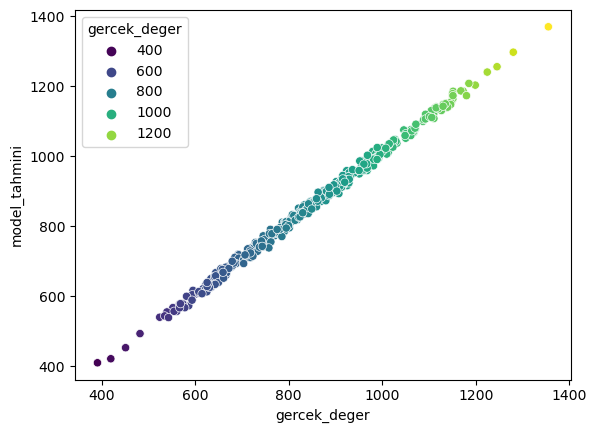

In [129]:
sbn.scatterplot(x="gercek_deger", y="model_tahmini", hue="gercek_deger", data=tahmin_degeri, palette="viridis")

In [130]:
#hata sapma oranını : 
from sklearn.metrics import mean_absolute_error

mean_absolute_error(tahmin_degeri["gercek_deger"],tahmin_degeri["model_tahmini"])
#modelimizde +-11.447093777962891 sapma mevcuttur

11.447093777962891

In [131]:
tahmin_degeri.describe()

,gercek_deger,model_tahmini
count,400.000000,400.000000
mean,850.943900,860.661499
std,163.494868,166.049332
min,390.856887,409.167480
25%,732.519971,739.587982
50%,851.105359,861.693604
75%,961.458607,970.197250
max,1355.213745,1369.537476


In [132]:
#yeni tahminlerde bulunalım 

833,9206369 =  1750,033229	1749,427281 exelden alınan örnek


In [141]:
yeni_bisilet_özellik = [[1750.033229,1749.427281]]
yeni_bisilet_özellik2 = [[1748.656426,1752.539962]]

In [143]:
veri = scaler.transform(yeni_bisilet_özellik)

In [144]:
veri

array([[0.47984163, 0.48089894]])

In [145]:
model.predict(veri)

1/1 [==============================] - 0s 20ms/step


array([[835.2836]], dtype=float32)

örnek1 : model tahmini  = 835.2836 iken gerçek degerimiz = 833,9206369

örnek2 : model tahmini  = 1091.9861 iken gerçek degerimiz = 1053.4865

In [146]:
#model kaydetmek için:
from tensorflow.keras.models import load_model

In [157]:
model.save("bisiklet_modeli.keras")

In [158]:
loaded_model = load_model('bisiklet_modeli.keras') #modeli yükledmim


In [186]:
kontrol_verisi =  [[1750,1750]] #var olmayan bir bisiklet denendi
kontrol_verisi  = scaler.transform(kontrol_verisi)
kontrol_verisi

array([[0.47654209, 0.53968791]])

In [187]:
loaded_model.predict(kontrol_verisi)

1/1 [==============================] - 0s 20ms/step


array([[884.908]], dtype=float32)